### [Cardano](https://cardano.org/) Price Pridiction using the Time Series Model

This jupyter notebook is written to pridict future prices for Cardano (ADA) digital coin which has been traded in the cryptocurrency market since 2017.



**This project is not a financial advise and shouldn't be used for any investment decision ----- Only for educational purpose!!!**



[Facebook prophet](https://facebook.github.io/prophet/) time series analysis model has been used to forcast prices for cardano digital coin.

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [6]:
import warnings; 
warnings.simplefilter('ignore')

## Install required dependecies

In [7]:
!pip3 install pandas
!pip3 install prophet

## Import libraries 

In [8]:
import pandas as pd
from datetime import datetime
from prophet import Prophet
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

Importing plotly failed. Interactive plots will not work.


## Load data to the data frame 

In [42]:
df = pd.read_csv('ada.csv')

In [ ]:
### Format the date to meet the requirement 



In [43]:
df[['month','day','year']] = df['date'].str.split('/',expand=True)

In [44]:
df['updated'] = df['month']+'/'+df['day']+'/'+df['year']

df['date_new'] = df.apply(lambda row: datetime.strptime(row['updated'], '%m/%d/%y'), axis=1)

In [45]:
df['ds'] = pd.DatetimeIndex(df['date_new'])

In [46]:
df.head()

,date,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,month,day,year,updated,date_new,ds
0,9/23/17,0,14404,14405,14405,1811,14405,14405,68,14405,...,NaN,0.000000e+00,NaN,NaN,9,23,17,9/23/17,2017-09-23,2017-09-23
1,9/24/17,8,14404,14405,14405,1811,14405,14405,68,14405,...,NaN,9.000000e-11,NaN,NaN,9,24,17,9/24/17,2017-09-24,2017-09-24
2,9/25/17,16,14404,14405,14405,1811,14405,14405,68,14405,...,NaN,3.200000e-10,NaN,NaN,9,25,17,9/25/17,2017-09-25,2017-09-25
3,9/26/17,4,14404,14405,14405,1811,14405,14405,68,14405,...,NaN,3.550000e-10,NaN,NaN,9,26,17,9/26/17,2017-09-26,2017-09-26
4,9/27/17,12,14404,14406,14406,1811,14405,14406,68,14405,...,NaN,1.583333e-01,NaN,NaN,9,27,17,9/27/17,2017-09-27,2017-09-27


In [47]:
df.tail()

,date,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,month,day,year,updated,date_new,ds
1450,9/12/21,157676,9582,910547,1945870,1005,301031,1609689,137,62149,...,597.986110,69.267663,0.063274,0.061453,9,12,21,9/12/21,2021-09-12,2021-09-12
1451,9/13/21,132467,9548,911118,1952943,1006,300808,1613998,138,62009,...,616.074970,69.330202,0.063119,0.062926,9,13,21,9/13/21,2021-09-13,2021-09-13
1452,9/14/21,137096,9551,914604,1963413,1002,301312,1621288,138,61978,...,461.856781,69.428474,0.062569,0.062886,9,14,21,9/14/21,2021-09-14,2021-09-14
1453,9/15/21,140285,9550,918316,1975963,1008,302236,1629556,138,62102,...,586.071606,69.557805,0.062532,0.062528,9,15,21,9/15/21,2021-09-15,2021-09-15
1454,9/16/21,140222,9527,921587,1987983,1010,302714,1637946,139,62201,...,580.538004,69.649431,0.062336,0.061205,9,16,21,9/16/21,2021-09-16,2021-09-16


## Drop all columns except the date and price 
The priceUSD column contains null cells which will be dropped later

In [52]:
df.drop(df.columns.difference(['ds','PriceUSD']), 1, inplace=True)

In [55]:
df.head()

,PriceUSD,ds
0,NaN,2017-09-23
1,NaN,2017-09-24
2,NaN,2017-09-25
3,NaN,2017-09-26
4,NaN,2017-09-27


In [56]:
df.tail()

,PriceUSD,ds
1450,2.598626,2021-09-12
1451,2.407190,2021-09-13
1452,2.395207,2021-09-14
1453,2.489856,2021-09-15
1454,2.421659,2021-09-16


#### Check the dimesion of the dataFrame 

In [57]:
df.shape

(1455, 2)

#### Drop all the null cells in the dataFrame

In [58]:
df.dropna(inplace=True)

In [59]:
df.shape

(1386, 2)

#### Rename PriceUSD column to 'y' before feeding it the Facebook prophet model

In [61]:
df['y'] = df['PriceUSD']

In [37]:
df.head()

,ds,y
69,2017-12-01,0.129954
70,2017-12-02,0.133454
71,2017-12-03,0.132005
72,2017-12-04,0.136586
73,2017-12-05,0.128868


In [63]:
df.drop(['PriceUSD'], axis=1, inplace=True)
df.columns = ['ds', 'y']

In [39]:
df.head()

,ds,y
69,2017-12-01,0.129954
70,2017-12-02,0.133454
71,2017-12-03,0.132005
72,2017-12-04,0.136586
73,2017-12-05,0.128868


In [64]:
df.shape

(1386, 2)

## Training model

In [41]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

## Predict price (Forcast away)

In [27]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-12-01,0.205444,0.102779,0.730033,0.205444,0.205444,0.211635,0.211635,0.211635,0.305031,...,-0.001342,-0.001342,-0.001342,-0.092054,-0.092054,-0.092054,0.0,0.0,0.0,0.417079
1,2017-12-02,0.203570,0.104424,0.722096,0.203570,0.203570,0.210466,0.210466,0.210466,0.305031,...,0.002674,0.002674,0.002674,-0.097239,-0.097239,-0.097239,0.0,0.0,0.0,0.414036
2,2017-12-03,0.201696,0.089251,0.717617,0.201696,0.201696,0.206659,0.206659,0.206659,0.305031,...,0.003672,0.003672,0.003672,-0.102044,-0.102044,-0.102044,0.0,0.0,0.0,0.408355
3,2017-12-04,0.199823,0.094044,0.682577,0.199823,0.199823,0.197323,0.197323,0.197323,0.305031,...,-0.001312,-0.001312,-0.001312,-0.106396,-0.106396,-0.106396,0.0,0.0,0.0,0.397145
4,2017-12-05,0.197949,0.094005,0.699000,0.197949,0.197949,0.190931,0.190931,0.190931,0.305031,...,-0.003875,-0.003875,-0.003875,-0.110225,-0.110225,-0.110225,0.0,0.0,0.0,0.388879


### Plot the pridicted prices for Cardano (ADA)

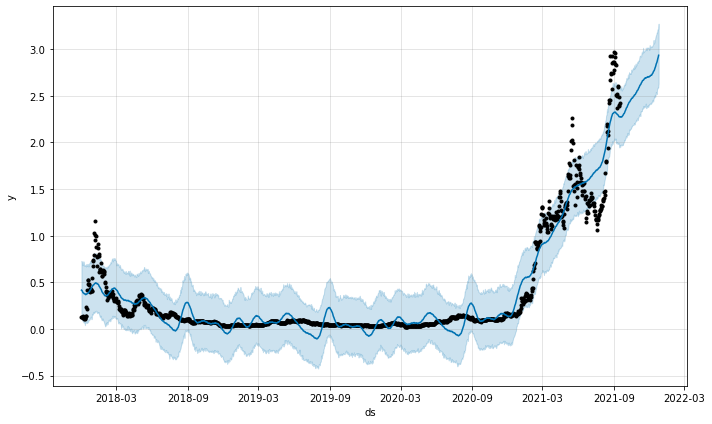

In [28]:
plot1 = m.plot(forecast)

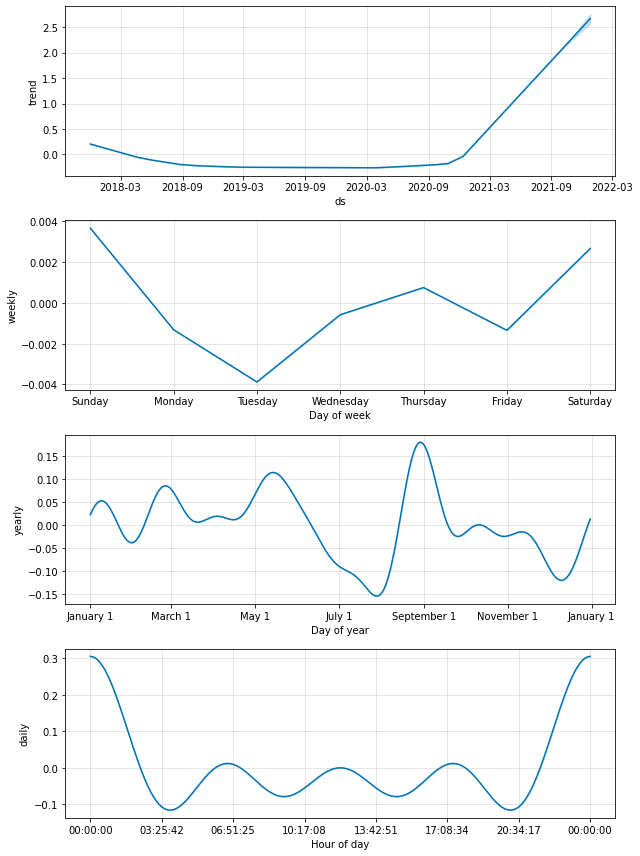

In [29]:
plt2 = m.plot_components(forecast)